## Informasi Mahasiswa

Nama : Ulan Sawalia

NPM  : 2108107010024

Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Dataset yang berisi kumpulan data yang berisi informasi tentang harga dan penjualan avokad dari berbagai wilayah di Amerika Serikat.

*Informasi Atribut: 
1. Date 
2. AveragePrice 
3. type 
4. year 
5. Region 
6. Total volume
7. 4046 - total buah terjual 4046
8. 4225 - total buah terjual 4225
9. 4770 - total buah terjual 4770
10. Total Bags	
11. Small Bags	
12. Large Bags	
13. XLarge Bags

Studi Kasus : Memprediksi harga dari buah alpukat di wilayah Amerika Serikat

## Import Library

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from numpy import argmax


In [3]:
df = pd.read_csv('avocado.csv')

## Preprocessing Data

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df = df.drop(['Unnamed: 0', 'Date'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
# cek apakah ada missing value pada dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_12296\2500791549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


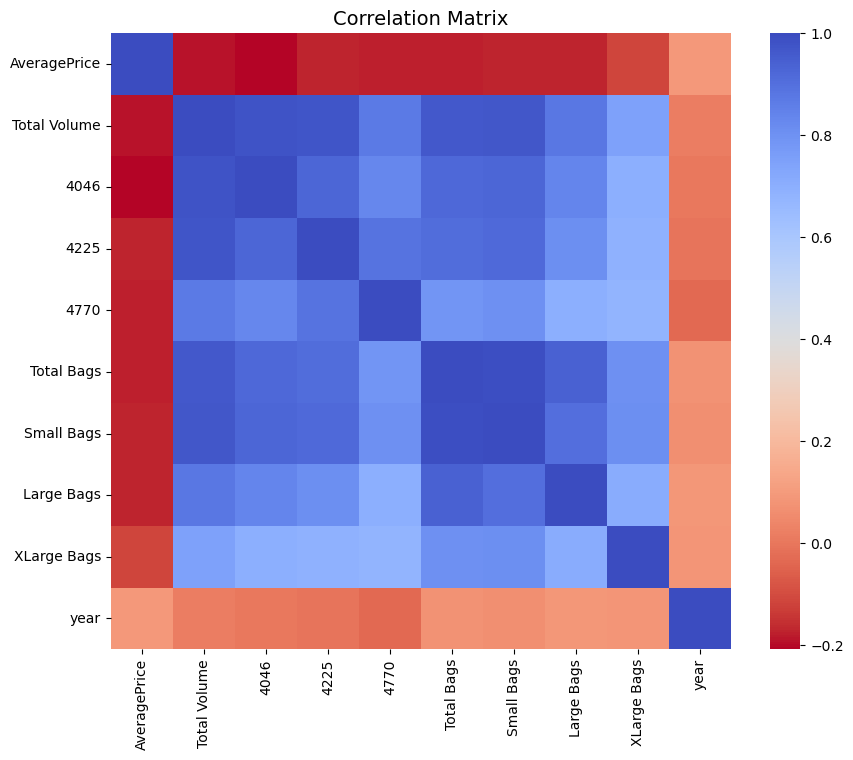

In [8]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

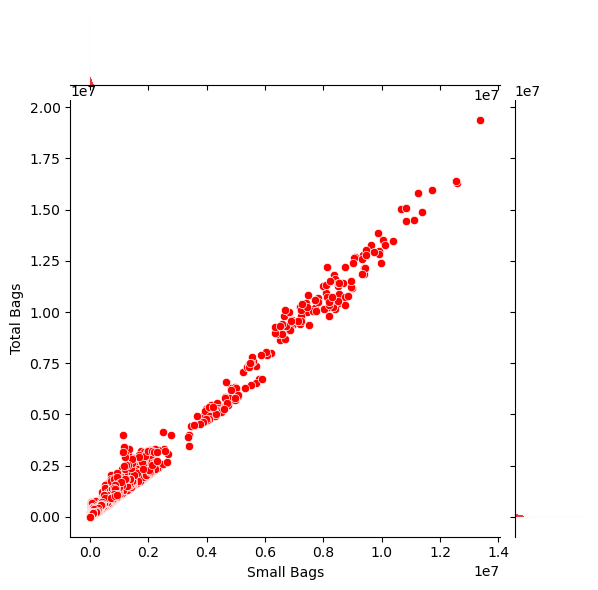

In [9]:
sns.jointplot(x='Small Bags',y='Total Bags',data=df, color='red')

<Axes: xlabel='year', ylabel='AveragePrice'>

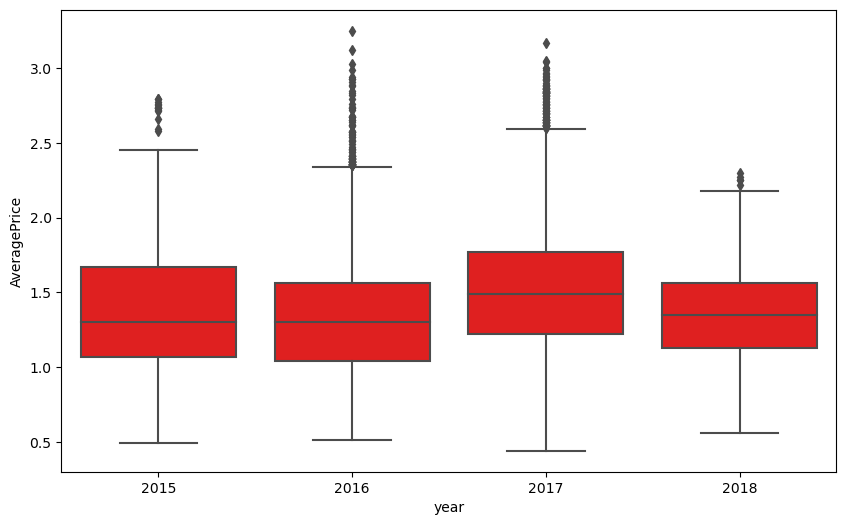

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=df,color='red')

C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_12296\1017607057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_val, color='r')


(0.44, 3.25)

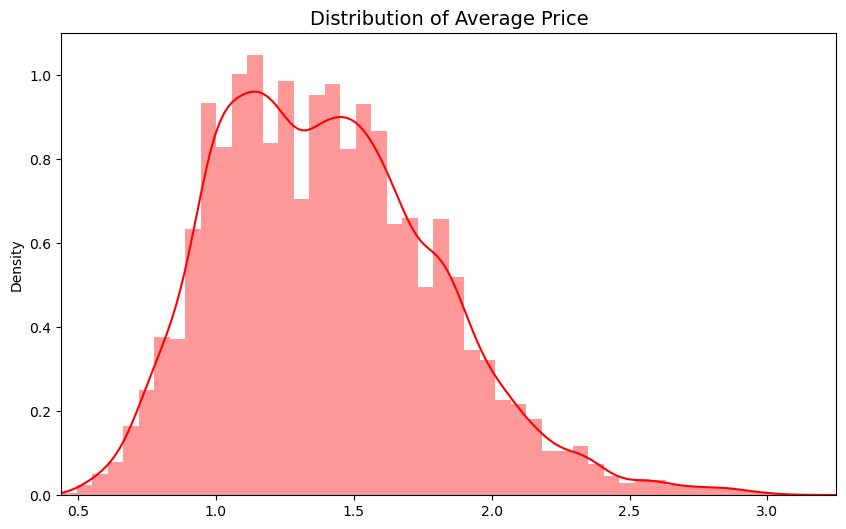

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
price_val = df['AveragePrice'].values
sns.distplot(price_val, color='r')
ax.set_title('Distribution of Average Price', fontsize=14)
ax.set_xlim([min(price_val), max(price_val)])

In [12]:
X = df.drop(['AveragePrice'], axis = 1).values
y = df['AveragePrice'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 9])
labelencoder_X_2 = LabelEncoder()
X[:, 9] = labelencoder_X_2.fit_transform(X[:, 10])
labelencoder_X_3 = LabelEncoder()
X[:, 10] = labelencoder_X_3.fit_transform(X[:, 10])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
scaled_features = scaler.transform(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:9])
df_feat.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558


## Train test split, label encoding

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [16]:
print(X_train.shape[1])
print(X_train.shape[0])
print(len(np.unique(y_train)))
print((len(np.unique(y_train)) + X_train.shape[0]) /2)

11
14599
256
7427.5


In [17]:
import matplotlib.pyplot as plt

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


c:\Users\Acer-TC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0090 - loss: -43.1639 - val_accuracy: 0.0085 - val_loss: -851.8682
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0092 - loss: -1860.5098 - val_accuracy: 0.0085 - val_loss: -7191.3916
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0098 - loss: -10102.8311 - val_accuracy: 0.0085 - val_loss: -23366.4043
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0091 - loss: -28377.8027 - val_accuracy: 0.0085 - val_loss: -51810.9453
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0081 - loss: -59159.5273 - val_accuracy: 0.0085 - val_loss: -93990.3281
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0084 - loss: -103261.4766 - val_accuracy: 0.0085 - val_loss: -151227.2812
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0106 - loss: -162847.1719 - val_accuracy: 0.0085 - val_loss: -224229.8281
Epoch 8/100
457/457 ━━━━━━━━━━

In [18]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print("Loss: ", loss)

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0092 - loss: -185119808.0000
Loss:  [-189480128.0, 0.0084931505843997]


Loss output dari data predict adalah -151603072.0, 0.0084931505843997

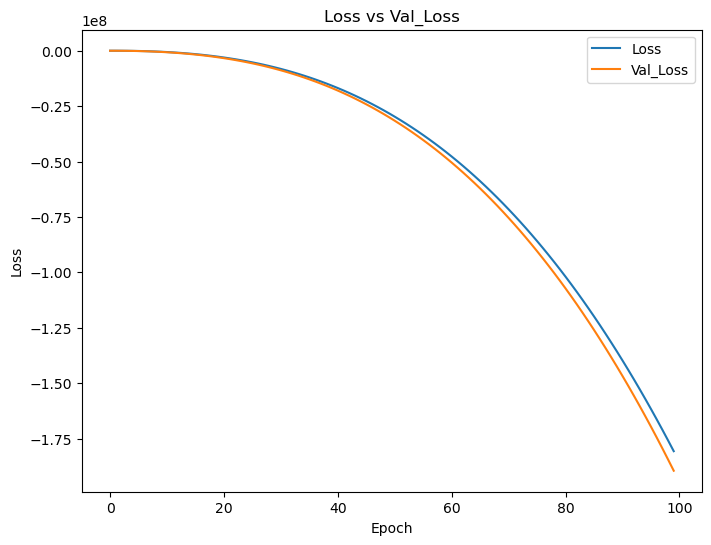

In [19]:
# plot loss dan val_loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Loss') # loss is the loss on the training set
plt.plot(history.history['val_loss'], label='Val_Loss') # val loss is the loss on the validation set
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Val_Loss')
plt.legend() # tambahkan legenda
plt.show()
